In [90]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
from rdkit import DataStructs, Chem
#from hcluster import pdist, linkage, dendrogram
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [13]:
m1 = Chem.MolFromSmiles('COc1cnc(NS(=O)(=O)c2ccc(N)cc2)nc1')
m2 = Chem.MolFromSmiles('Cc1ccc(NC(=O)Cc2c(C)[nH]c(=O)[nH]c2=O)c(OCC2CCCO2)c1')
m3 = Chem.MolFromSmiles('COc1cnc(NS(=O)(=O)c2ccc(N)cc2)nc1')

fp1 = Chem.RDKFingerprint(m1)
fp2 = Chem.RDKFingerprint(m2)

c = [fp1,fp2]
g = DataStructs.BulkTanimotoSimilarity(fp1,c)
display(g)


[1.0, 0.21038495971351837]

# This code creates the tanimoto similarity matrix

In [18]:
filepath = "C:/Users/Tim/Documents/GitHub/Biola-Lawrence-Livermore-Project/biola_gt_v1.csv"
filepath2 = "C:/Users/Tim/Documents/GitHub/Biola-Lawrence-Livermore-Project/rdkit_molecular_fingerprints_base64_encoded_v1.csv"
# read the CSV file
df_smiles = pd.read_csv(filepath)
df_fp = pd.read_csv(filepath2)
#display(df_smiles,len(df_fp))
fp_similarity_matrix = []
mols = [Chem.MolFromSmiles(x) for x in df_smiles.SMILES]
fps = [Chem.RDKFingerprint(x) for x in mols]
fp_similarity_matrix = [DataStructs.BulkTanimotoSimilarity(x,fps) for x in fps]

#display(fp_similarity_matrix)
fp_similarity_matrix = np.asarray(fp_similarity_matrix) #this is the numpy array version of the matrix
df_fp_similarity_matrix = pd.DataFrame(fp_similarity_matrix, columns =df_fp.compound_id)

display(df_fp_similarity_matrix)


SMILES  docking_score_0  \
0                     COc1cnc(NS(=O)(=O)c2ccc(N)cc2)nc1             -6.5   
1     Cc1ccc(NC(=O)Cc2c(C)[nH]c(=O)[nH]c2=O)c(OCC2CC...             -8.6   
2            CCCC(C(=O)O)c1c(C)nc2ccc(Cl)cc2c1-c1ccccc1             -6.3   
3     CS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(F)cc2...             -7.8   
4     CCC(C)NS(=O)(=O)c1cc([N+](=O)[O-])ccc1Oc1c(C)c...             -7.1   
...                                                 ...              ...   
3392  O=C(CSc1nnc(-c2cccc(S(=O)(=O)N3CCOCC3)c2)n1-c1...             -8.8   
3393  CN(C)[C@@H]1C(=O)C(C(=N)O)C(=O)[C@@]2(O)C(O)=C...             -8.0   
3394   CCOC(C(=O)N1CCc2[nH]c3ccc(F)cc3c(=O)c2C1)C1CCOC1             -7.2   
3395  C[C@@H]1C[C@@H](O[C@@H]2[C@@H](O)[C@H](OCCc3cc...             -5.4   
3396  O=C(CC1SC(=Nc2ccc(S(=O)(=O)N3CCOCC3)cc2)N(CC2C...             -7.9   

      docking_score_1  docking_score_2  docking_score_3  docking_score_4  \
0                -6.4             -6.4             -6.4             -6.4   
1                -8.2             -8.1             -8.1             -8.0   
2                -6.2             -6.1             -6.0             -5.8   
3                -7.8             -7.7             -7.7             -7.7   
4                -7.1             -7.0             -7.0             -6.9   
...               ...              ...              ...              ...   
3392             -8.8             -8.8             -8.7             -8.7   
3393             -7.7             -7.4             -7.1             -7.1   
3394             -7.2             -7.1             -6.9             -6.9   
3395             -5.4             -5.4             -5.3             -5.3   
3396             -7.9             -7.4             -7.4             -7.4   

      docking_score_5  docking_score_6  docking_score_7  docking_score_8  ...  \
0                -6.4             -6.4             -6.3             -6.3  ...   
1                -7.7             -7.6             -7.6             -7.5  ...   
2                -5.8             -5.7             -5.7             -5.7  ...   
3                -7.7             -7.7             -7.6             -7.6  ...   
4                -6.9             -6.8             -6.8             -6.8  ...   
...               ...              ...              ...              ...  ...   
3392             -8.7             -8.7             -8.7             -8.6  ...   
3393             -7.0             -6.9             -6.9             -6.8  ...   
3394             -6.8             -6.8             -6.8             -6.6  ...   
3395             -5.3             -5.2             -5.2             -5.1  ...   
3396             -7.3             -7.3             -7.3             -7.3  ...   

      fusion_score_0 fusion_score_1  fusion_score_2  fusion_score_3  \
0           4.460487       4.044235        4.129290        4.380529   
1           5.017297       5.020628        5.094811        5.083579   
2           5.086847       5.154779        5.065155        5.005481   
3           4.871450       4.774629        5.036002        5.049101   
4           4.394884       4.392059        4.645932        4.387681   
...              ...            ...             ...             ...   
3392        4.413547       4.616728        4.699987        4.703806   
3393        5.150659       5.189899        5.068437        5.172480   
3394        5.105710       4.952858        5.053580        5.015277   
3395        4.142048       4.314600        4.598043        4.127811   
3396        4.681370       4.652846        4.711303        4.686849   

      fusion_score_4  fusion_score_5  fusion_score_6  fusion_score_7  \
0           4.063299        4.397693        4.057523        4.231697   
1           5.003088        5.041513        4.943490        4.957990   
2           5.147954        5.159865        5.155783        5.201808   
3           4.957252        4.898449        4.748098        4.817905   
4           4.481109        4.425047 

3397

compound_id  CHEMBL1200359  PV-001826976736  CHEMBL2180479  CHEMBL274990  \
0                 1.000000         0.210385       0.186137      0.214928   
1                 0.210385         1.000000       0.362645      0.301282   
2                 0.186137         0.362645       1.000000      0.333778   
3                 0.214928         0.301282       0.333778      1.000000   
4                 0.231488         0.412409       0.441040      0.383194   
...                    ...              ...            ...           ...   
3392              0.217697         0.378665       0.405549      0.401650   
3393              0.201385         0.410143       0.483152      0.401864   
3394              0.200000         0.388021       0.465945      0.355598   
3395              0.169946         0.343373       0.330837      0.287365   
3396              0.253743         0.365258       0.380629      0.354754   

compound_id  35896398  27177123  25392386  ZINC3178194  ZINC1533102   6569505  \
0            0.231488  0.184168  0.193878     0.154242     0.120991  0.204628   
1            0.412409  0.363764  0.324568     0.227882     0.166823  0.432776   
2            0.441040  0.376547  0.327385     0.183908     0.174129  0.410366   
3            0.383194  0.309717  0.279593     0.179553     0.142332  0.337289   
4            1.000000  0.460432  0.367050     0.224918     0.171833  0.501139   
...               ...       ...       ...          ...          ...       ...   
3392         0.525099  0.390784  0.342303     0.221990     0.170504  0.465738   
3393         0.595400  0.454545  0.391960     0.227538     0.159038  0.530101   
3394         0.510932  0.486433  0.357190     0.214182     0.205447  0.457688   
3395         0.366527  0.346099  0.288606     0.198198     0.158149  0.363223   
3396         0.486361  0.384762  0.357288     0.254277     0.142417  0.443905   

compound_id  ...  enamine-Z2394565290  enamine-Z26394334  \
0            ...             0.200954           0.264292   
1            ...             0.366077           0.365621   
2            ...             0.427725           0.420261   
3            ...             0.426386           0.319921   
4            ...             0.523411           0.481306   
...          ...                  ...                ...   
3392         ...             0.493447           0.453659   
3393         ...             0.554450           0.482366   
3394         ...             0.491496           0.468790   
3395         ...             0.349109           0.306204   
3396         ...             0.448276           0.466623   

compound_id  world_drugs-ZINC000096014306  enamine-Z1546799992  \
0                                0.156499             0.196176   
1                                0.304094             0.374603   
2                                0.305073             0.408926   
3                                0.263643             0.360151   
4                                0.371463             0.483817   
...                                   ...                  ...   
3392                             0.340347             0.461274   
3393                             0.389718             0.541534   
3394                             0.362924             0.435465   
3395                             0.462185             0.358744   
3396                             0.330921             0.419965   

compound_id  world_drugs-ZINC000001554274  emolecules-43731782  \
0                                0.195550             0.217697   
1                                0.256927             0.378665   
2                                0.242921             0.405549   
3                                0.213301             0.401650   
4                                0.268153             0.525099   
...                                   ...                  ...   
3392                             0.244371             1.000000   
3393                             0.275487             0.549815   
3394  

# This creates just the dendrogram

In [270]:
from plotly.figure_factory import create_dendrogram
g = df_fp_similarity_matrix#.head(1000)#to test I just used 1000 ligands. you can send the whole dataframe to see it with all the data
#first_n_column  = g.iloc[: , :1000]# you can remove this if you want to test the whole dataframe
corr = 1 - g#first_n_column
corr_condensed = squareform(corr) # convert to condensed
#print(corr_condensed)
z = linkage(corr_condensed, method='average')
#print(z)
# dendrogram_g = dendrogram(z, labels=first_n_column.columns)
# plt.xticks(rotation=90)
# #print(type(plt.xticks()))
# print(dendrogram)
# plt.show()
# print(dendrogram_g['ivl'])
#g = corr.set_index(first_n_column.columns)
#display(g.reindex(dendrogram_g['ivl']))

fig = create_dendrogram(corr.T, labels=g.columns)
fig.update_layout({'width':36000, 'height':36000,
                         'showlegend':False, 'hovermode': 'closest', 'margin':dict(autoexpand = True)
                         })
fig.update_xaxes(tickangle=-90)
#fig.show()
fig.write_image("tanimoto_dendrogram2.jpeg")

# This creates the dendrogram with the heatmap

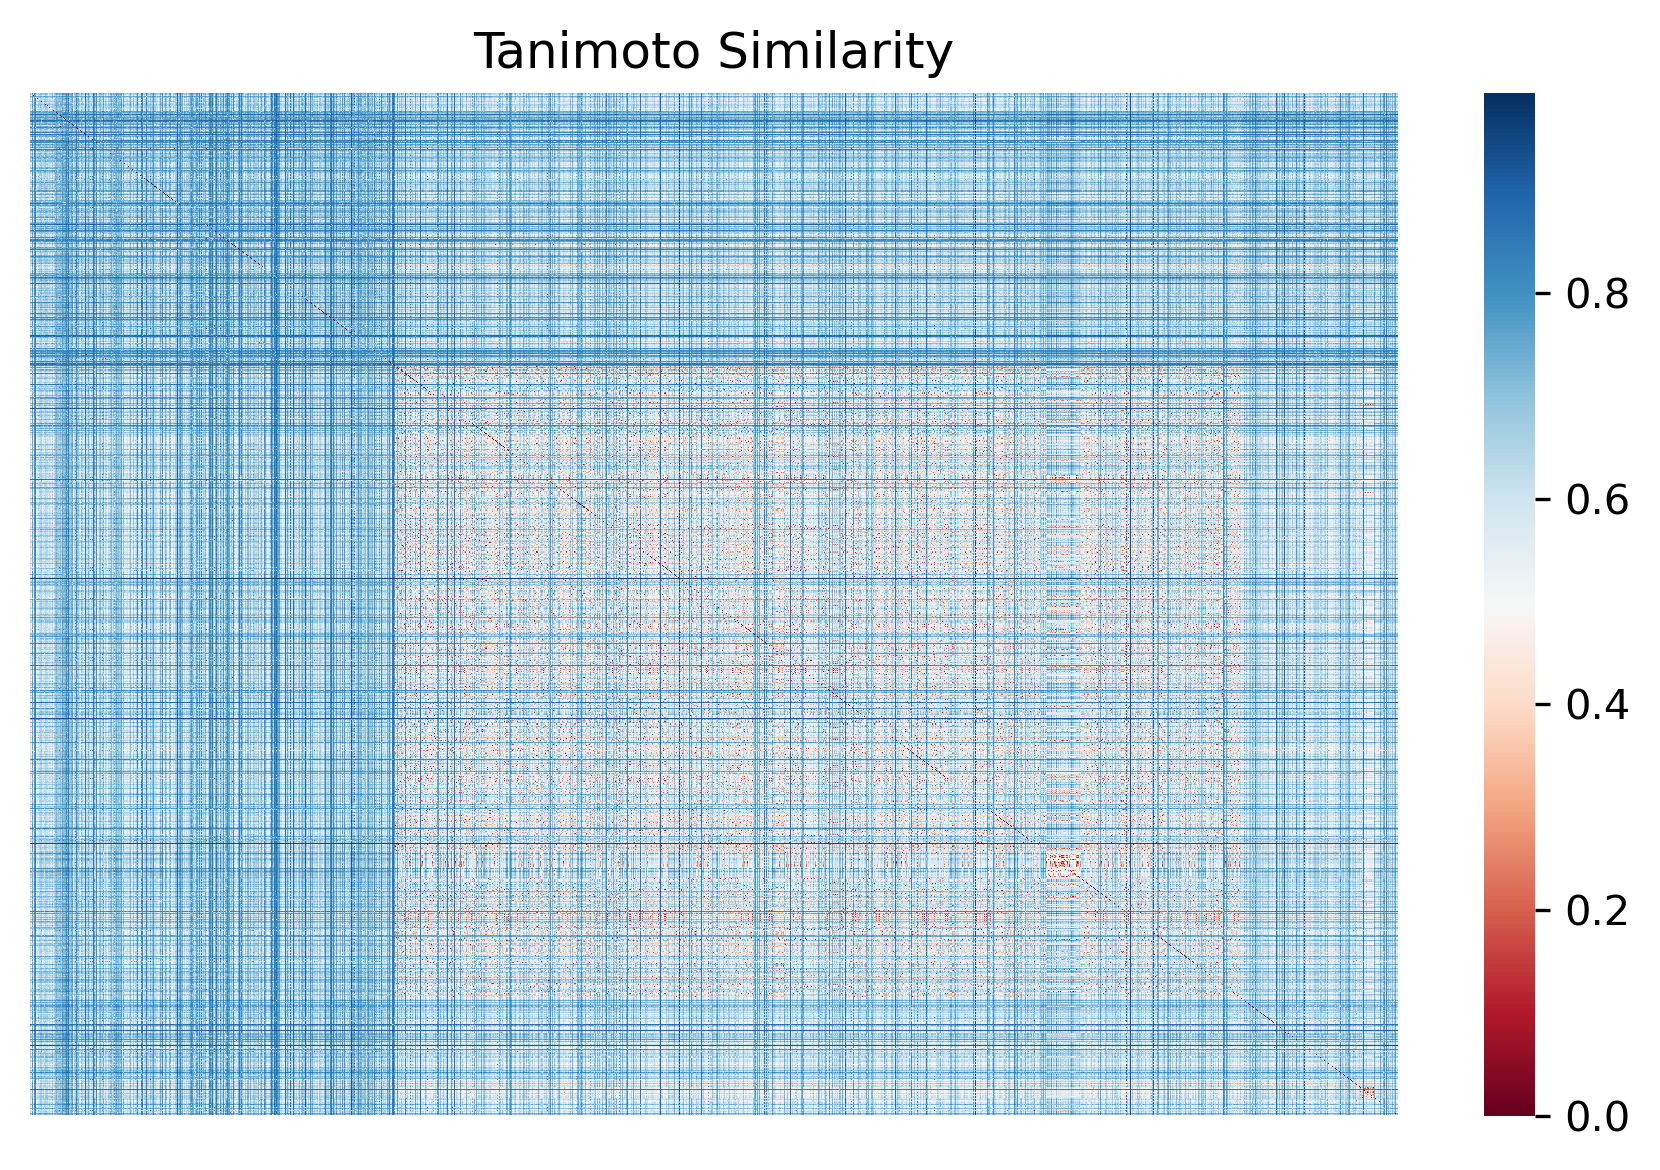

In [296]:


import numpy as np
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

g = df_fp_similarity_matrix#.head(20)
first_n_column  = g.iloc[: , :20]
data_array = 1 - g#first_n_column
#display(data_array)
labels = data_array.columns
#display(data_array)

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right',labels=labels)
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
# for data in dendro_side['data']:
#     fig.add_trace(data)

# Create Heatmap
dendro_leaves1 = dendro_side['layout']['yaxis']['ticktext']
#print(dendro_leaves)
sorter = np.argsort(labels.values)
dendro_leaves = sorter[np.searchsorted(labels.values, dendro_leaves1, sorter=sorter)]
#print(dendro_leaves,len(dendro_leaves))
#dendro_leaves = list(map(int, dendro_leaves))
#print(dendro_leaves)
#data_dist = pdist(data_array)
#print(dendro_leaves)
#data_array = data_array.reindex(dendro_leaves)
#display(data_array)
#display(data_array)
plt.figure(dpi = 300) 
g2 = sns.heatmap(data_array, cmap='RdBu')
g2.set(title='Tanimoto Similarity')
g2.set(yticklabels=[])
g2.set(ylabel=None)  # remove the y-axis label
g2.tick_params(left=False)  # remove the ticks
g2.set(xticklabels=[])
g2.set(xlabel=None)  # remove the y-axis label
g2.tick_params(bottom=False)  # remove the ticks
plt.tight_layout()
#plt.set_dpi(300.0)
plt.show()
#plt.savfig('tanimoto_heatmap.png')


In [157]:
g = df_fp_similarity_matrix#.head(20)
first_n_column  = g.iloc[: , :20]
data_array = 1 - g#first_n_column
#display(data_array)
labels = data_array.columns
#display(data_array)

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right',labels=labels)
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
# for data in dendro_side['data']:
#     fig.add_trace(data)

# Create Heatmap
dendro_leaves1 = dendro_side['layout']['yaxis']['ticktext']
#print(dendro_leaves)
sorter = np.argsort(labels.values)
dendro_leaves = sorter[np.searchsorted(labels.values, dendro_leaves1, sorter=sorter)]
#print(dendro_leaves,len(dendro_leaves))
#dendro_leaves = list(map(int, dendro_leaves))
#print(dendro_leaves)
#data_dist = pdist(data_array)
#print(dendro_leaves)
data_array = data_array.reindex(dendro_leaves)
#display(data_array)
#print(len(data_dist))
#heat_data = squareform(data_array)
#print(heat_data)
#heat_data = heat_data[dendro_leaves,:]
#heat_data = heat_data[:,dendro_leaves]
#print(heat_data)
#print(data_array.values)
# heatmap = [
#     go.Heatmap(
#         x = dendro_leaves,
#         y = dendro_leaves,
#         z = data_array.values,
#         colorscale = 'bluered',
#         colorbar=dict(title = 'Tanimoto',xpad = 50)
#     )
# ]

# heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
# heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# # Add Heatmap Data to Figure
# for data in heatmap:
#     fig.add_trace(data)

# fig['layout']['yaxis']['ticktext'] = np.asarray(dendro_leaves1)
# fig['layout']['yaxis']['tickvals'] = np.asarray(dendro_side['layout']['yaxis']['tickvals'])
# # Edit Layout
# fig.update_layout({'width':800, 'height':800,
#                          'showlegend':False, 'hovermode': 'closest', 'margin':dict(autoexpand = True)
#                          })
# #fig.update_coloraxes(colorbar_xpad=10)

# fig.update_layout(
#     coloraxis_colorbar=dict(
#         title="Tanimoto",
#     ),
# )
# # Edit xaxis
# fig.update_layout(xaxis={'domain': [.15, 1],
#                                   'mirror': False,
#                                   'showgrid': False,
#                                   'showline': False,
#                                   'zeroline': False,
#                                   'ticks':""})
# # Edit xaxis2
# fig.update_layout(xaxis2={'domain': [0, .15],
#                                    'mirror': False,
#                                    'showgrid': False,
#                                    'showline': False,
#                                    'zeroline': False,
#                                    'showticklabels': False,
#                                    'ticks':""})

# # Edit yaxis
# fig.update_layout(yaxis={'domain': [0, .85],
#                                   'mirror': False,
#                                   'showgrid': False,
#                                   'showline': False,
#                                   'zeroline': False,
#                                   'showticklabels': False,
#                                   'ticks': ""
#                         })
# # Edit yaxis2
# fig.update_layout(yaxis2={'domain':[.825, .975],
#                                    'mirror': False,
#                                    'showgrid': False,
#                                    'showline': False,
#                                    'zeroline': False,
#                                    'showticklabels': False,
#                                    'ticks':""})
# fig.update_layout(
#     title={
#         'text': "Tanimoto Similarity",
#         'y':0.9,
#         'x':0.55,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.update_layout(
#     yaxis={'side': 'right'}  
# )

# # fig.update_layout(coloraxis_colorbar_x=0.1)
# # fig.update_layout(coloraxis_colorbar_y=1)
# # fig.update_layout(
# #     pad={
# #         'autoexpand': True,'l':20})

# # Plot
# #fig.update_yaxes(side="left")
# fig.show()
#fig.write_image("tanimoto_heatmap.jpeg")
#[0, 3, 1, 2, 4]

index of first occurrence of each value:  [1 0]
